# PRE-PROCESSING


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('file:///C:/Users/Jordan%20Uzan/Desktop/MACHINE%20LEARNING/PYTHON%20SP%C3%89CIAL%20MACHINE%20LEARNING/datasetCovid.xlsx')

In [5]:
df = data.copy()

df.iloc[:20,:]


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creation of subset


In [6]:
missing_rate=df.isna().sum()/df.shape[0]

In [7]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [8]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [9]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']


In [10]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


# TrainSet ///////TestSet 

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)


In [13]:
trainset['SARS-Cov-2 exam result'].value_counts()


negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [14]:
testset['SARS-Cov-2 exam result'].value_counts()


negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

# Encoding

# Qualitative Variable 

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col:<45} {df[col].unique()}')

SARS-Cov-2 exam result                        ['negative' 'positive']
Respiratory Syncytial Virus                   [nan 'not_detected' 'detected']
Influenza A                                   [nan 'not_detected' 'detected']
Influenza B                                   [nan 'not_detected' 'detected']
Parainfluenza 1                               [nan 'not_detected' 'detected']
CoronavirusNL63                               [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                        [nan 'detected' 'not_detected']
Coronavirus HKU1                              [nan 'not_detected' 'detected']
Parainfluenza 3                               [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                      [nan 'not_detected' 'detected']
Adenovirus                                    [nan 'not_detected' 'detected']
Parainfluenza 4                               [nan 'not_detected' 'detected']
Coronavirus229E                               [nan 'not_detected' 'detec

In [16]:
def encoding(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code)
        
    return df

# Imputation

In [17]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

# Feature engineering 
   #####  - (viral/blood , Target/blood) => Creat a new column 'Is sick'
   #####    - All other diseases in one column 'is sick' ans delete all viral_col 

In [18]:
def feature_engineering(df):
    df['is sick'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

# Preprocessing

In [19]:

def preprocessing(df):
    
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts(),"Target")
    
    return X, y

# Train set / Test set 


In [20]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64 Target


C:\Users\Jordan Uzan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jordan Uzan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64 Target


C:\Users\Jordan Uzan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jordan Uzan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Modellisation

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA

In [23]:
model_1 = RandomForestClassifier(random_state=0)

In [38]:
preprocessor= make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

In [39]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

In [47]:
dict_list_of_models={'RandomForest':RandomForest,'AdaBoost':AdaBoost,'SVM':SVM,'KNN':KNN}

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

Train score = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

Train score = [1.         1.         1.         1.         1.         1.
 1.         0.99050325 0.97751938 0.97148784]
SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93

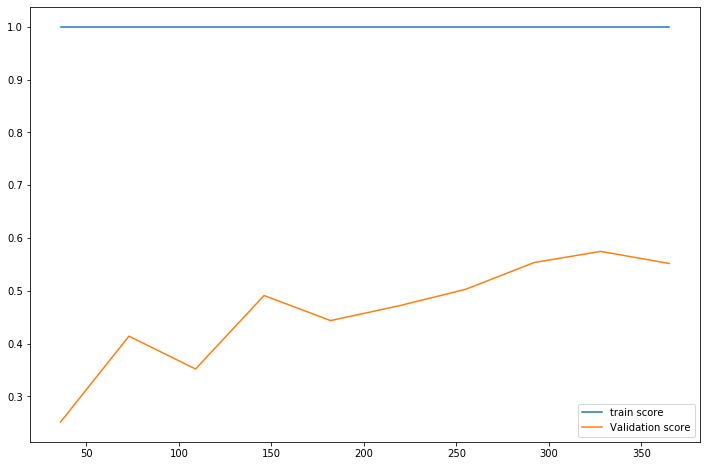

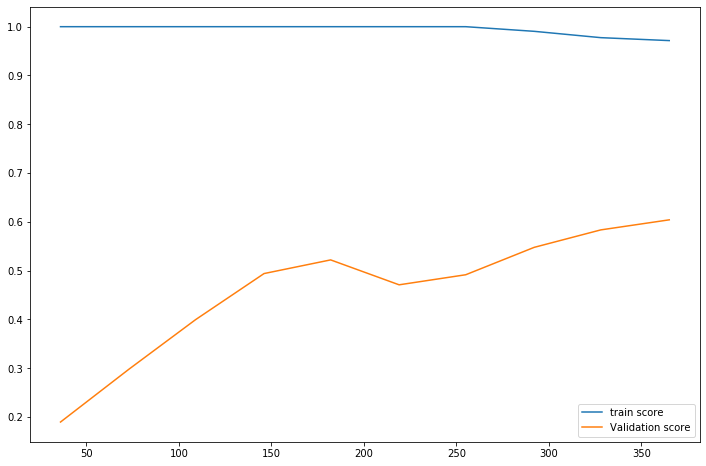

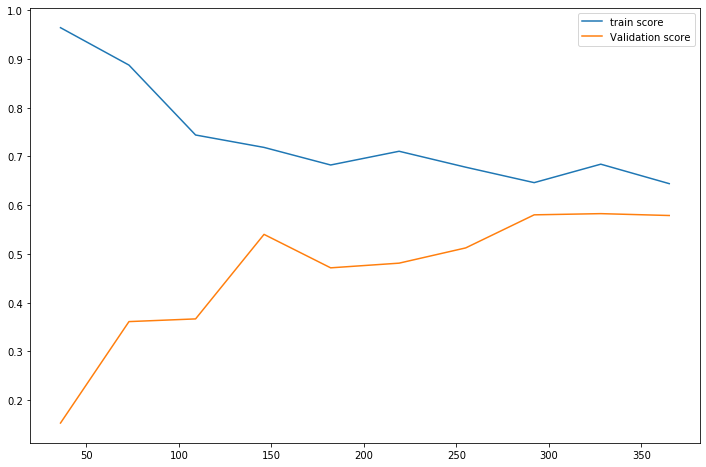

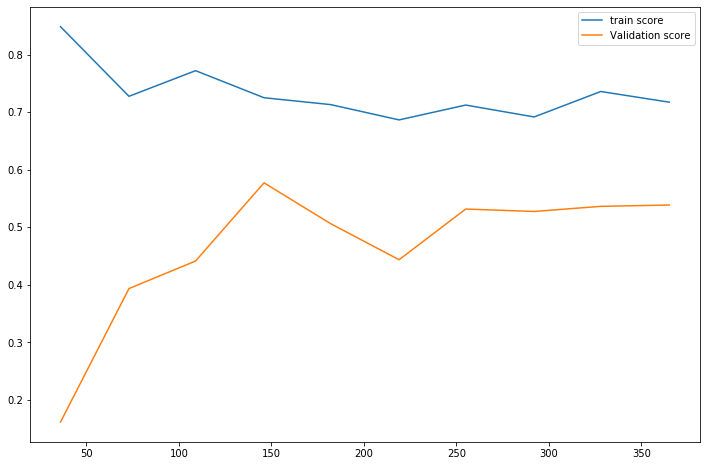

In [48]:
for name, model in dict_list_of_models.items():
    print(name)
    evaluation(model)
    
    

# Assessment procedure

In [25]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [26]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model,X_train, y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
    
    print('Train score =',train_score.mean(axis=1))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='Validation score')
    plt.legend()

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111

Train score = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


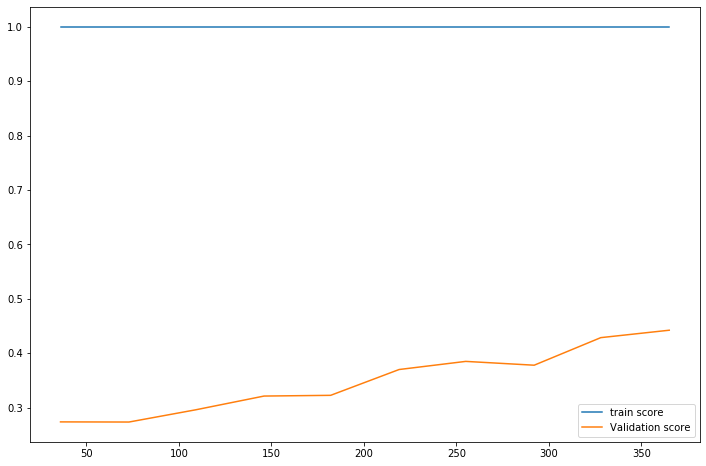

In [27]:
evaluation(model_1)

In [28]:
pd.DataFrame(model_1.feature_importances_,index=X_train.columns)

,0
Patient age quantile,0.044181
Hematocrit,0.049772
Hemoglobin,0.039850
Platelets,0.112081
Mean platelet volume,0.040389
Red blood Cells,0.049993
Lymphocytes,0.051813
Mean corpuscular hemoglobin concentration (MCHC),0.044944
Leukocytes,0.210472
Basophils,0.027783


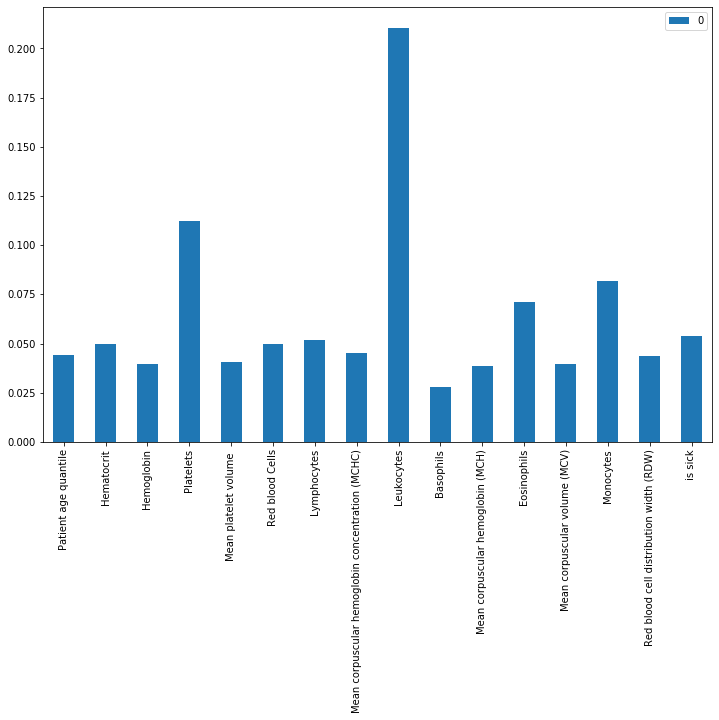

In [29]:
pd.DataFrame(model_1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

# OPTIMISATION SVM

In [62]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [59]:
SVM



Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x0000021B7521B678>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', ke

In [73]:
hyper_params={'svc__gamma':[1e-3,1e-4],
              'svc__C':[1,10,100,1000],
              'pipeline__polynomialfeatures__degree':[2, 3, 4],
              'pipeline__selectkbest__k':range(54,60)}
        

In [74]:
grid=RandomizedSearchCV(SVM,hyper_params,scoring='recall',cv=4,n_iter=40)

In [75]:
grid.fit(X_train,y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 54, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.56      0.56      0.56        16

    accuracy                           0.87       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.87      0.87      0.87       111



[[88  7]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.56      0.56      0.56        16

    accuracy                           0.87       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.87      0.87      0.87       111

Train score = [1.         1.         1.         0.97560976 0.96340426 0.9515625
 0.89509648 0.88038457 0.87789947 0.87806057]


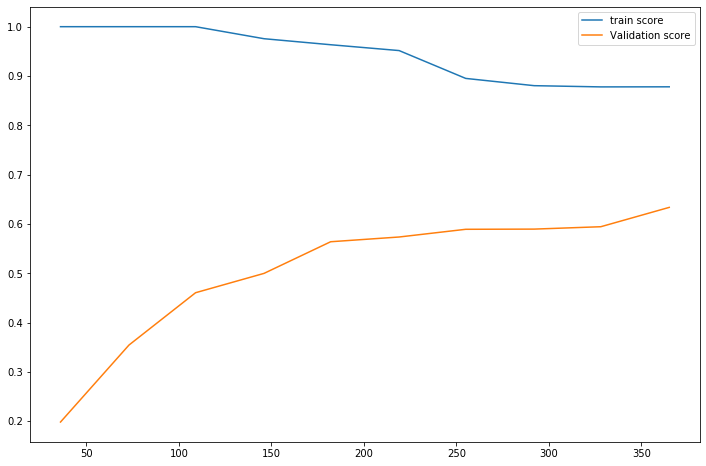

In [76]:
evaluation(grid.best_estimator_)

# Precision Recall Curve 

In [77]:
from sklearn.metrics import precision_recall_curve

In [78]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))



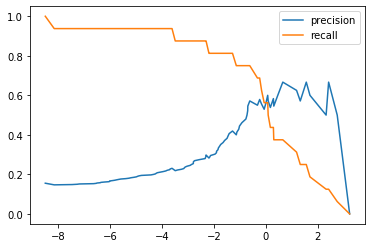

In [80]:
plt.plot(threshold, precision[:-1],label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()


In [81]:
def model_final(model,X,treshold=0):
    return model.decision_function(X)>treshold


In [82]:
y_pred=model_final(grid.best_estimator_,X_test,treshold=-1)

In [85]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.75

In [83]:
f1_score(y_test,y_pred)

0.5714285714285714